<a href="https://colab.research.google.com/github/mgrecu35/CellDynamics/blob/main/cell_dynamics_ode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

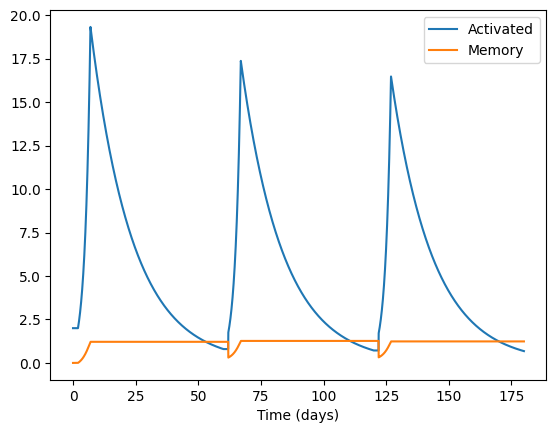

In [4]:
import numpy as np
import matplotlib.pyplot as plt

p=0.5/24.     # rate of activation = 2 per day
q=0.05/24.  # rate of conversion from activated to memory = 0.05 per day
da=0.06/24. # death rate of activated cells 0.48 per day
Ton=2*24 #  time of onset  in hours
Toff=7*24 # time of offset in hours

dm=0  # death rate of memory cells
A0=2 # initial number of activated cells
M0=0   # initial number of memory cells
Mmax=2 # maximum number of memory cells
def model(state_vars,t,Ton,Toff,p,q,da,dm):
    A,M=state_vars
    if t<Ton:
        dAdt=0
        dMdt=0
    else:
        if t<Toff:
            qlim=q*(Mmax-M)/Mmax # logistic growth
            dAdt=(p-qlim)*A
            dMdt=qlim*A
        else:
            dAdt=-da*A
            dMdt=-dm*M
    return np.array([dAdt,dMdt])

t=np.linspace(0,3*60*24,3*1000)
state_vars=np.array([A0,M0])
A_L=[A0]
M_L=[M0]
for i in range(1,len(t)):
    dt=t[i]-t[i-1]
    icycle=int(t[i-1]/(60*24))
    if t[i]-icycle*60*24>Ton and t[i-1]-icycle*60*24<=Ton:
      A,M=state_vars
      Mconv=0.75*M
      A+=Mconv
      M-=Mconv
      state_vars[0]=A
      state_vars[1]=M
    state_vars=state_vars+model(state_vars,t[i]-icycle*60*24,Ton,Toff,p,q,da,dm)*dt
    A_L.append(state_vars[0])
    M_L.append(state_vars[1])

plt.plot(t/24,A_L,label='Activated')
plt.plot(t/24,M_L,label='Memory')
plt.xlabel('Time (days)')
plt.legend()